# Taiwan Credit Default Dataset: Decision Tree Classifier
*Ben Perkins*
*08.14.2022*

In [100]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [101]:
%cd /content/gdrive/MyDrive/Github/ml-blog

/content/gdrive/MyDrive/Github/ml-blog


In [102]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlrd

In [105]:
filename = 'default of credit card clients.xls'

In [106]:
DATA = os.path.relpath('/content/gdrive/MyDrive/Github/ml-blog/credit/data/' + filename)

In [107]:
df = pd.read_excel(DATA, 'Data', index_col=[0], header=[1], na_values='NA')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [108]:
X = df.iloc[:, :23]
Y = df.iloc[:, 23]
X.head(), Y.head()

(    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
 ID                                                                         
 1       20000    2          2         1   24      2      2     -1     -1   
 2      120000    2          2         2   26     -1      2      0      0   
 3       90000    2          2         2   34      0      0      0      0   
 4       50000    2          2         1   37      0      0      0      0   
 5       50000    1          2         1   57     -1      0     -1      0   
 
     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
 ID         ...                                                         
 1      -2  ...        689          0          0          0         0   
 2       0  ...       2682       3272       3455       3261         0   
 3       0  ...      13559      14331      14948      15549      1518   
 4       0  ...      49291      28314      28959      29547      2000   
 5       0  ...      

### One-Hot Encoding
* Categorical features `PAY_0`:`PAY_6` need to be encoded, primarily because `-1` for "paying duly" may introduce ordinality.


In [115]:
from sklearn.preprocessing import OneHotEncoder

X_ohe = X.iloc[:, 1:11].drop(columns='AGE', axis=1)

In [116]:
X_ohe.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,,,,
1,2,2,1,2,2,-1,-1,-2,-2
2,2,2,2,-1,2,0,0,0,2
3,2,2,2,0,0,0,0,0,0
4,2,2,1,0,0,0,0,0,0
5,1,2,1,-1,0,-1,0,0,0


In [117]:
one_hot_enc = OneHotEncoder(handle_unknown='ignore')
one_hot_enc.fit(X_ohe)
ohe_feat_arr = one_hot_enc.transform(X_ohe).toarray()

In [118]:
type(ohe_feat_arr)

numpy.ndarray

In [123]:
ohe_cols = one_hot_enc.get_feature_names_out()
ohe_cols

array(['SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2',
       'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8'], dtype=

In [124]:
ohe_df_out = pd.DataFrame(ohe_feat_arr, columns=ohe_cols, index=X_ohe.index)

In [125]:
ohe_df_out.head()

,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
X_ohe_done = pd.concat([X, ohe_df_out], axis=1)

In [129]:
X_ohe_done.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,120000,2,2,2,26,-1,2,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90000,2,2,2,34,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000,2,2,1,37,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,50000,1,2,1,57,-1,0,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
X_ohe_done.drop(X_ohe_done.iloc[:, 1:11], axis=1, inplace=True)
X_ohe_done.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,3913,3102,689,0,0,0,0,689,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
X_ohe_done.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0',
       'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 

In [131]:
X_ohe_done.head(), Y.head()

(    LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
 ID                                                                     
 1       20000       3913       3102        689          0          0   
 2      120000       2682       1725       2682       3272       3455   
 3       90000      29239      14027      13559      14331      14948   
 4       50000      46990      48233      49291      28314      28959   
 5       50000       8617       5670      35835      20940      19146   
 
     BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  ...  PAY_6_-2  PAY_6_-1  PAY_6_0  \
 ID                                           ...                                
 1           0         0       689         0  ...       1.0       0.0      0.0   
 2        3261         0      1000      1000  ...       0.0       0.0      0.0   
 3       15549      1518      1500      1000  ...       0.0       0.0      1.0   
 4       29547      2000      2019      1200  ...       0.0       0.0      1.

### Standardize Numeric Variable Data

* Choosing this feature scaler, instead of `MinMaxScaler`, for example, so that the great variation between values in `BILL_X` and others is somewhat accounted for.

In [136]:
from sklearn.preprocessing import StandardScaler

X_scale_ready = pd.concat([X.loc[:, 'LIMIT_BAL'], X.loc[:, 'AGE':'PAY_AMT6']], axis=1).drop(columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)
X_scale_ready.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [141]:
scaler = StandardScaler()
X_scale_done = scaler.fit_transform(X_scale_ready)
X_scaled_df = pd.DataFrame(X_scale_done, columns=scaler.get_feature_names_out(), index=X_scale_ready.index)
X_ohe_scaled = pd.concat([X_ohe_done.iloc[:, 13:], X_scaled_df], axis=1)

X_ohe_scaled.head(), X_ohe_scaled.columns

(    SEX_1  SEX_2  EDUCATION_0  EDUCATION_1  EDUCATION_2  EDUCATION_3  \
 ID                                                                     
 1     0.0    1.0          0.0          0.0          1.0          0.0   
 2     0.0    1.0          0.0          0.0          1.0          0.0   
 3     0.0    1.0          0.0          0.0          1.0          0.0   
 4     0.0    1.0          0.0          0.0          1.0          0.0   
 5     1.0    0.0          0.0          0.0          1.0          0.0   
 
     EDUCATION_4  EDUCATION_5  EDUCATION_6  MARRIAGE_0  ...  BILL_AMT3  \
 ID                                                     ...              
 1           0.0          0.0          0.0         0.0  ...  -0.667993   
 2           0.0          0.0          0.0         0.0  ...  -0.639254   
 3           0.0          0.0          0.0         0.0  ...  -0.482408   
 4           0.0          0.0          0.0         0.0  ...   0.032846   
 5           0.0          0.0          0.0 

In [142]:
X_ohe_scaled.to_csv('taiwan-credit-X-prepped.csv', header=True)

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe_scaled, Y, test_size=0.2, random_state=42)

In [144]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

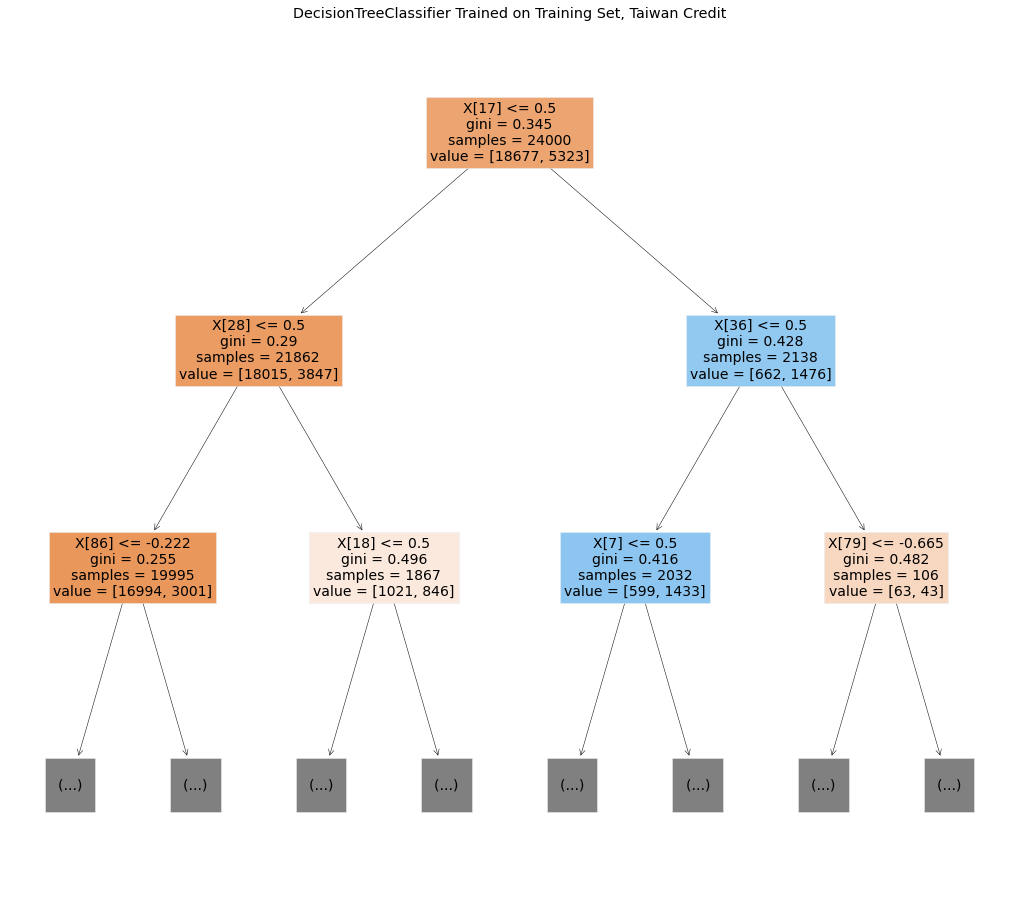

In [145]:
from sklearn import tree
plt.style.use('ggplot')
plt.figure(figsize=(18, 16))
tree.plot_tree(tree_clf, max_depth=2, filled=True, fontsize=14)
plt.title('DecisionTreeClassifier Trained on Training Set, Taiwan Credit')
plt.savefig('DTC_Taiwan_depth2.png')
plt.show()

In [146]:
np.set_printoptions(suppress=True)

In [147]:
tree_feats = tree_clf.feature_importances_
print('Feature importances: ', tree_feats)

Feature importances:  [0.         0.         0.         0.         0.         0.
 0.         0.00539047 0.         0.         0.         0.00158798
 0.         0.         0.         0.         0.         0.62309147
 0.03089118 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.18960965 0.02181296
 0.         0.         0.         0.         0.         0.
 0.01093066 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00394145 0.         0.03640274 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01208882 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00219729 0.00190426 0.         0.         0.
 0.         0.         0.06015108 0.         0.         0.
 0.        ]


In [148]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [149]:
y_pred = tree_clf.predict(X_test)

tree_acc = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy on Test Set: ', tree_acc)

Decision Tree Accuracy on Test Set:  0.82


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [151]:
confusion_matrix(y_test, y_pred)

array([[4454,  233],
       [ 847,  466]])

In [152]:
# Just to calculate the ratio of those instances covered by the main path to the whole

print(round(19673 / 24000, 4))

0.8197


In [153]:
tree_clf.classes_

array([0, 1])

In [154]:
type(y_pred), y_pred[2]

(numpy.ndarray, 0)

## Area Under ROC Curve Analysis

* In this case, the dataset has **imbalanced classes**. If we use the `accuracy_score` as the primary mode of evaluation, we are likely to have a model that does not generalize well to outside data. Furthermore, it is possible for a classifier to predict only one of the two classes for each instance, and still have about 82% accuracy. We need a better way to evaluate the models on this imbalanced binary classification problem.

* We will look instead to the **F1 Score** and the **Area Under the ROC Curve (AUC)** to understand our model's abilities.

Code reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=roc

In [155]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [156]:
y_probas = tree_clf.predict_proba(X_test)[:, 1] # using the 'greater label', i.e., 1 for 'No default'.

In [157]:
type(y_probas)

numpy.ndarray

In [158]:
y_test_np = y_test.to_numpy()

In [159]:
type(y_test_np), np.unique(y_test_np)

(numpy.ndarray, array([0, 1]))

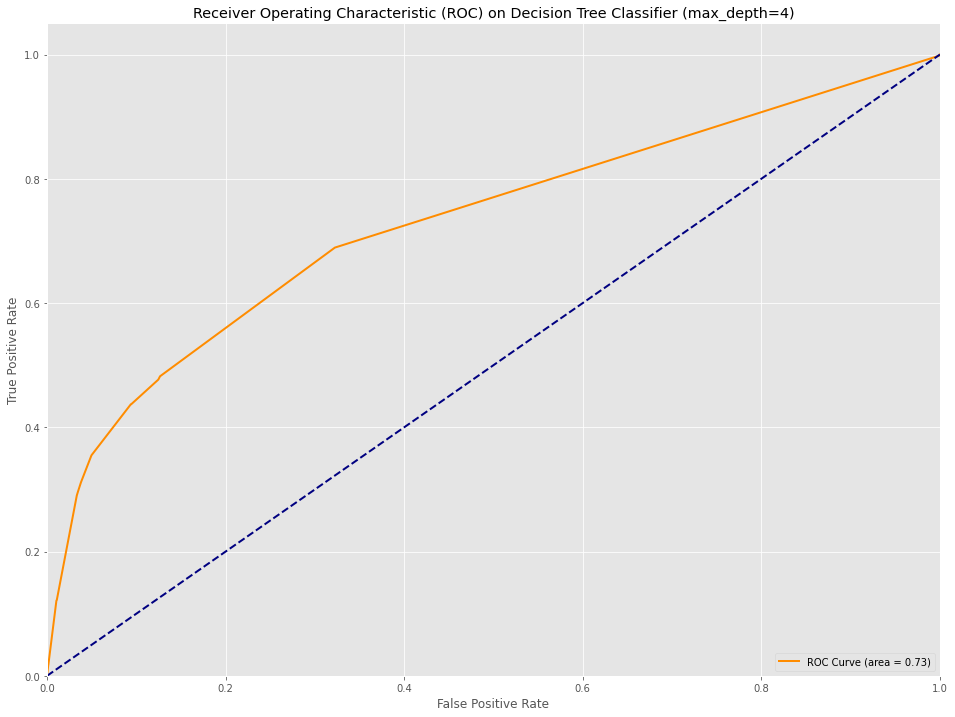

In [160]:
truePR = dict()
falsePR = dict()
roc_auc = dict()


falsePR, truePR, _ = roc_curve(y_test_np, y_probas)
roc_auc = auc(falsePR, truePR)

plt.figure(figsize=(16,12))
lw = 2
plt.plot(
    falsePR,
    truePR,
    color='darkorange',
    lw=lw,
    label="ROC Curve (area = %0.2f)" % roc_auc,
)

plt.plot([0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) on Decision Tree Classifier (max_depth=4)')
plt.legend(loc='lower right')
plt.savefig('./credit/EDA/dtree-bin-roc-auc-plot.png')
plt.show()


### Decision Tree Classifier, `class_weight='balanced'`

* Here, a parameter of the model is used to attempt to improve predictions by balancing the classes.

In [161]:
tree_clf_bal = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
tree_clf_bal.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

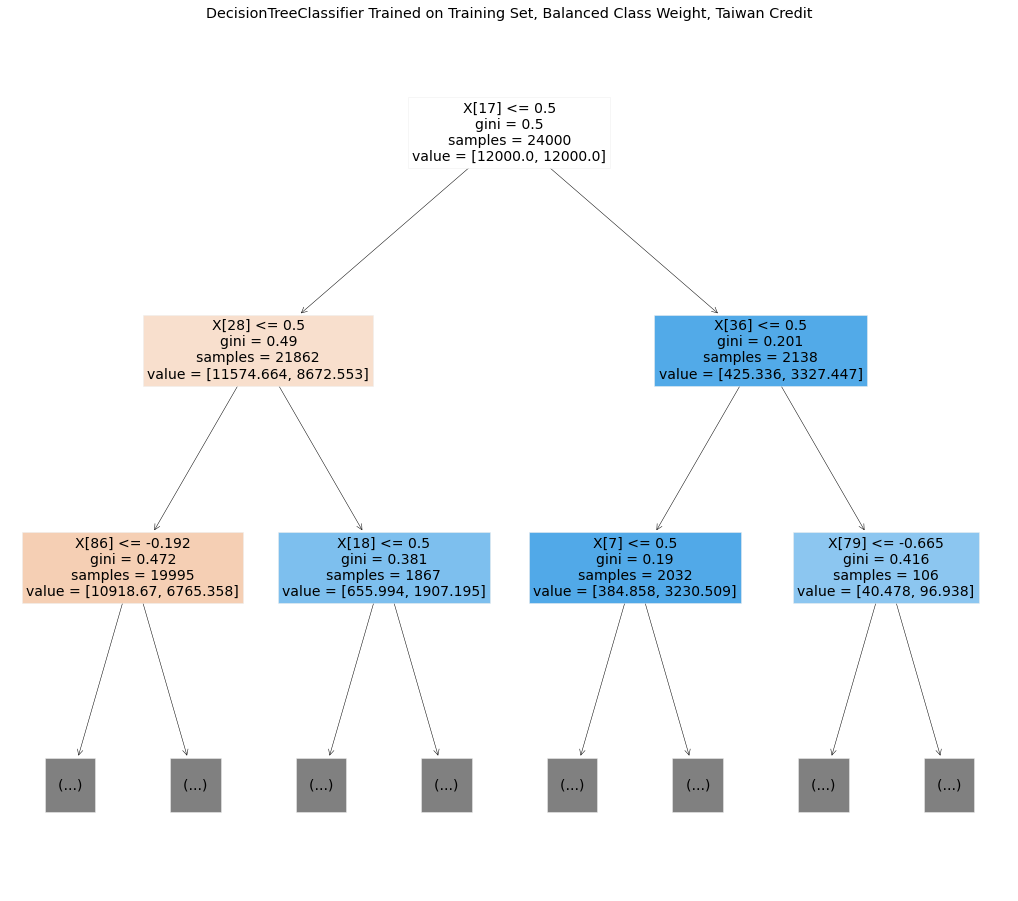

In [162]:
from sklearn import tree
plt.style.use('ggplot')
plt.figure(figsize=(18, 16))
tree.plot_tree(tree_clf_bal, max_depth=2, filled=True, fontsize=14)
plt.title('DecisionTreeClassifier Trained on Training Set, Balanced Class Weight, Taiwan Credit')
plt.savefig('DTC_Taiwan_depth2_bal.png')
plt.show()

In [165]:
y_pred_bal = tree_clf_bal.predict(X_test)

tree_acc_bal = accuracy_score(y_test, y_pred_bal)
print('Decision Tree Accuracy on Test Set: ', round(tree_acc_bal, 4))

Decision Tree Accuracy on Test Set:  0.7897
